In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
from scipy.stats import ttest_ind
pd.options.mode.chained_assignment = None  # default='warn'

# Cairo, Egypt Dataset





In [2]:
df_cairo = pd.read_csv("NO2-Cairo.csv")

In [3]:
df_cairo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    60 non-null     object 
 1   min     60 non-null     object 
 2   max     58 non-null     float64
 3   mean    58 non-null     float64
 4   SD      58 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.5+ KB


In [4]:
df_cairo.dropna(inplace = True)
df_cairo = df_cairo.loc[df_cairo["date"] != "6/4/2020"]
df_cairo = df_cairo.loc[df_cairo["date"] != "15/4/2020"]

The "6/4/2019" and "15/4/2019" values in the "date" column are missing, therefore, the corresponding dates, "6/4/2020"and "15/4/2020", are dropped to match the sample size and provide a fair dataset.

In [5]:
df_cairo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    56 non-null     object 
 1   min     56 non-null     object 
 2   max     56 non-null     float64
 3   mean    56 non-null     float64
 4   SD      56 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.6+ KB


No null values found.

In [6]:
df_cairo.head()

,date,min,max,mean,SD
0,1/4/2019,1.62E-05,0.000110,0.000047,0.000019
1,2/4/2019,2.98E-05,0.000459,0.000129,0.000079
2,3/4/2019,1.99E-05,0.001540,0.000252,0.000275
3,4/4/2019,3.35E-05,0.000272,0.000105,0.000055
4,5/4/2019,2.88E-05,0.000389,0.000077,0.000069


In [7]:
df_cairo.loc[:29,['year']] = 2019
df_cairo.loc[30:60,['year']] = 2020
df_cairo['year'] = df_cairo['year'].astype(int)
df_cairo.loc[0:8,['day']] = df_cairo["date"].str[:1]
df_cairo.loc[9:29,['day']] = df_cairo["date"].str[:2]
df_cairo.loc[30:38,['day']] = df_cairo["date"].str[:1]
df_cairo.loc[39:60,['day']] = df_cairo["date"].str[:2]
df_cairo.drop("date", axis = 1,inplace = True)
df_cairo = df_cairo[["day", "year", "min", "max", "mean", "SD"]]

In [8]:
df_cairo.head()

,day,year,min,max,mean,SD
0,1,2019,1.62E-05,0.000110,0.000047,0.000019
1,2,2019,2.98E-05,0.000459,0.000129,0.000079
2,3,2019,1.99E-05,0.001540,0.000252,0.000275
3,4,2019,3.35E-05,0.000272,0.000105,0.000055
4,5,2019,2.88E-05,0.000389,0.000077,0.000069


Create a "year" column for it to be used as "hue" for later visualizations, add a "day" column for it be used as the "x-axis" for later visualizations, and drop the "date" column for its unnecessity.
The month, April, in the "date" column is unnecessary because all of the data recorded is in April, and this fact is mentioned in the beginning of this notebook, report, and poster.

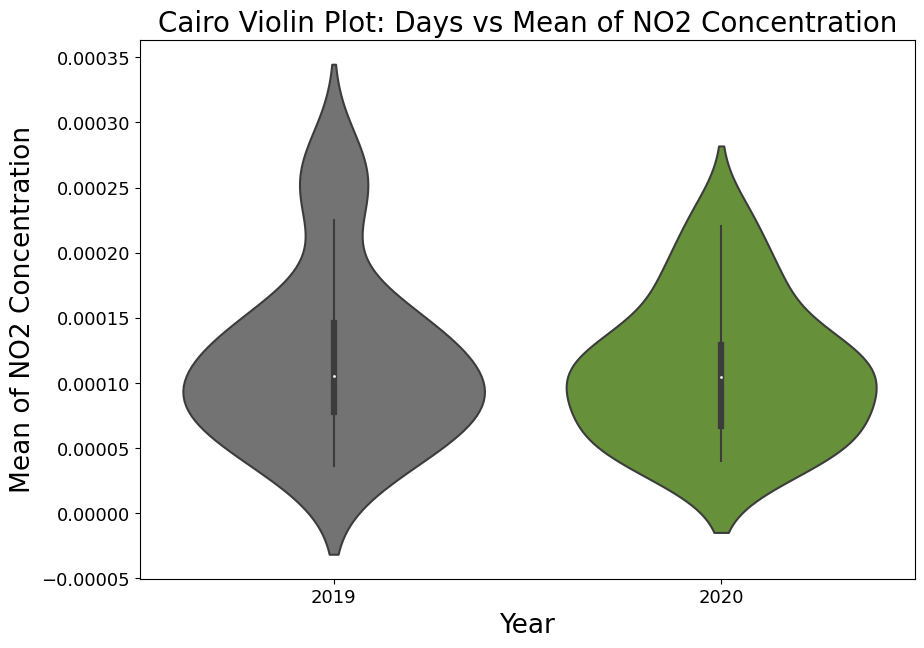

In [9]:
plt.figure(figsize=(10,7))
max_vs_days_violinplt = sns.violinplot(data=df_cairo, x="year",y= "mean", palette=["#737373", "#679F2A"])
max_vs_days_violinplt.axes.set_title("Cairo Violin Plot: Days vs Mean of NO2 Concentration",fontsize=20)
max_vs_days_violinplt.set_xlabel("Year",fontsize=19)
max_vs_days_violinplt.set_ylabel("Mean of NO2 Concentration",fontsize=19)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

Violin Plot showing the mean of Nitrogen Dioxide for every day in the month of April in Cairo in 2019 and 2020. The Violin Plot shows most of the calculated data is between the 0.00005-0.00015 range for both years. It is shown that 2019 has quite higher means, but they will be later visualized by other plots to be classified as outliers or not. The Violin Plot shows that the "Mean" may not be the best variable used to formulate the hypothesis upon.

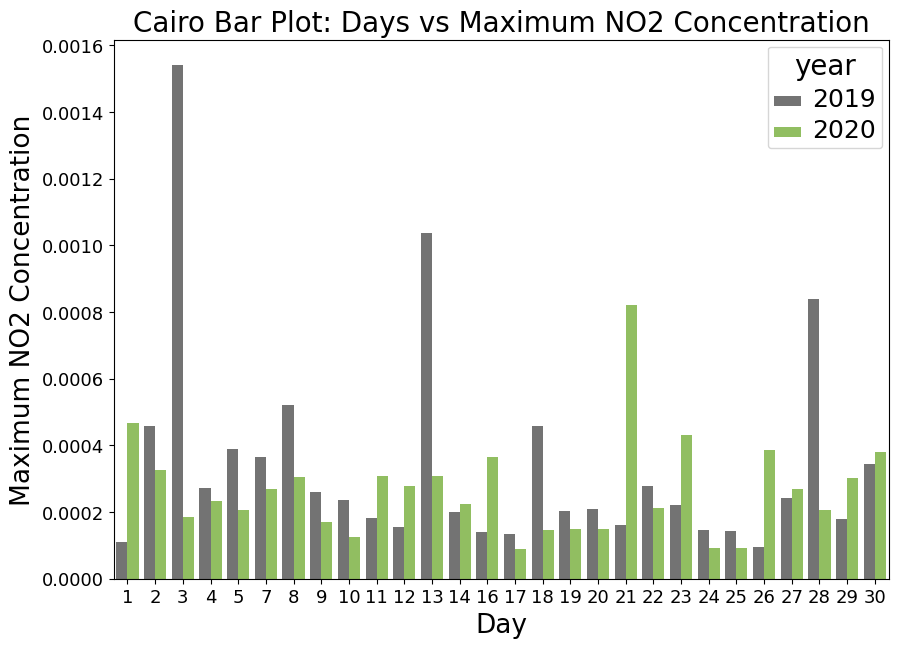

In [10]:
plt.figure(figsize=(10,7))
max_vs_days_barplt = sns.barplot(data=df_cairo, x="day", y="max", hue="year", palette=["#737373", "#92CD52"])
max_vs_days_barplt.axes.set_title("Cairo Bar Plot: Days vs Maximum NO2 Concentration",fontsize=20)
max_vs_days_barplt.set_xlabel("Day",fontsize=19)
max_vs_days_barplt.set_ylabel("Maximum NO2 Concentration",fontsize=19)
plt.setp(max_vs_days_barplt.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(max_vs_days_barplt.get_legend().get_title(), fontsize='20')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

Bar Plot showing the maximum computed value of Nitrogen Dioxide for each day in the month of April in Cairo in 2019 and 2020. The bar plot shows that the values in both years are close for most of the day with the 2019 data having a higher edge on 2020's. On notable few days of April, "3", "13", and "28", 2019 shows that the level of Nitrogen Dioxide is much higher and concentrated.

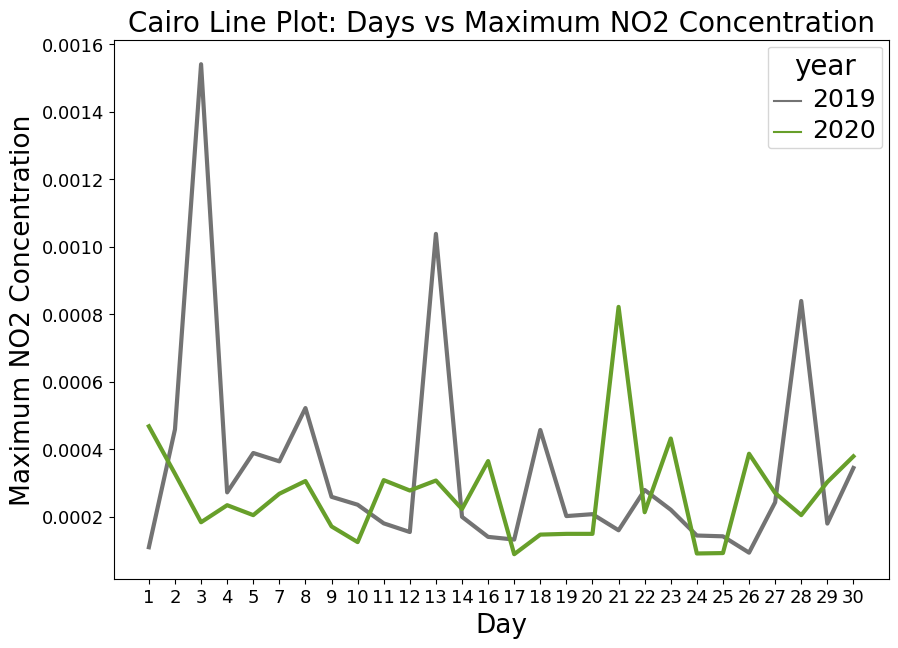

In [11]:
plt.figure(figsize=(10,7))
max_vs_days_lineplt = sns.lineplot(data=df_cairo, x="day", y="max", hue ="year", palette=["#737373", "#679F2A"], linewidth = 3)
max_vs_days_lineplt.axes.set_title("Cairo Line Plot: Days vs Maximum NO2 Concentration",fontsize=20)
max_vs_days_lineplt.set_xlabel("Day",fontsize=19)
max_vs_days_lineplt.set_ylabel("Maximum NO2 Concentration",fontsize=19)
plt.setp(max_vs_days_lineplt.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(max_vs_days_lineplt.get_legend().get_title(), fontsize='20')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

Line Plot showing the maximum computed value of Nitrogen Dioxide for each day in the month of April in Cairo in 2019 and 2020. The Line Plot shows that the maximum NO2 concentration in 2019 is much higher than the value in 2020 which is a motive to construct a hypothesis and conduct hypothesis testing on the two following categories, **maximum NO2 concentration values in 2019** and **maximum NO2 concentration values in 2020.**

### Step 1. Define null and alternative hypothesis
**μ1**: maximum NO2 concentration in April 2019

**μ2**: maximum NO2 concentration in April 2020

**Null hypothesis (H0)** : μ1 = μ2 (the two population means are equal)

There is **no difference** between the maximum NO2 concentration, before and after the Covid-19 Pandemic, in Cairo, Egypt. The Covid-19 Pandemic has no effect on the maximum NO2 concentration in Cairo, Egypt.

**Alternative hypothesis (Ha)** : μ1 ≠ μ2 (the two population means are not equal)

There is a **right-tailed difference**, μ1 > μ2, between the maximum NO2 concentration, before and after the Covid-19 Pandemic, in Cairo, Egypt. The maximum NO2 concentration is higher in April 2019 than in April 2020 due to the Covid-19 pandemic which led to lockdown/quarantine all over Egypt.

In [12]:
rv = t(df=28-2)

### Step 2. Choose the appropriate test

The appropriate test to conduct the hypothesis testing is the paired samples T-test. A paired samples T-test is used to compare the means of two samples when each observation in one sample can be paired with an observation in the other sample.

### Paired Samples T-test: Motivation
A paired samples T-test is commonly used in two scenarios:

1. A measurement is taken on a subject before and after some treatment – e.g. the maximum NO2 concentration is measured in April 2019 and April 2020, and the treatment, between both periods, is the Covid-19 pandemic.

2. A measurement is taken under two different conditions – e.g. the maximum NO2 concentration is measured in April 2019 and April 2020, and the condition, between both periods, is the Covid-19 pandemic.

In both cases I am interested in comparing the mean measurement between two groups in which each observation in one sample can be paired with an observation in the other sample.


In [13]:
t_stat,p_value = ttest_ind(df_cairo.loc[:29,['max']],df_cairo.loc[30:,['max']])

### Step 3. Calculate the p-value


In [14]:
print("T-stat value:", t_stat)
print("P-value:", p_value)

T-stat value: [1.07981959]
P-value: [0.28502196]


### Step 4. Determine the statistical significance

The commonly used significance level threshold is 0.05. Since the p-value here (0.285) is greater than 0.05, I can say that it is statistically insignificant based on the collected sample. Thus, I fail to reject the null hypothesis (H0). In laymen's terms, this usually means thatIe do not have statistical evidence that the difference in groups is not due to chance. Reasons for failing to reject the null hypothesis (H0) are having a small sample size, bias in data, weak effect size between the two sample sets.


# Lisbon, Portugal

In [15]:
df_lisbon_2019 = pd.read_csv("NO2-Lisbon-2019.csv")
df_lisbon_2020 = pd.read_csv("NO2-Lisbon-2020.csv")

In [16]:
df_lisbon_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Countrycode               8760 non-null   object 
 1   Namespace                 8760 non-null   object 
 2   AirQualityNetwork         8760 non-null   object 
 3   AirQualityStation         8760 non-null   object 
 4   AirQualityStationEoICode  8760 non-null   object 
 5   SamplingPoint             8760 non-null   object 
 6   SamplingProcess           8760 non-null   object 
 7   Sample                    8760 non-null   object 
 8   AirPollutant              8760 non-null   object 
 9   AirPollutantCode          8760 non-null   object 
 10  AveragingTime             8760 non-null   object 
 11  Concentration             8737 non-null   float64
 12  UnitOfMeasurement         8760 non-null   object 
 13  DatetimeBegin             8760 non-null   object 
 14  Datetime

In [17]:
df_lisbon_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Countrycode               8784 non-null   object 
 1   Namespace                 8784 non-null   object 
 2   AirQualityNetwork         8784 non-null   object 
 3   AirQualityStation         8784 non-null   object 
 4   AirQualityStationEoICode  8784 non-null   object 
 5   SamplingPoint             8784 non-null   object 
 6   SamplingProcess           8784 non-null   object 
 7   Sample                    8784 non-null   object 
 8   AirPollutant              8784 non-null   object 
 9   AirPollutantCode          8784 non-null   object 
 10  AveragingTime             8784 non-null   object 
 11  Concentration             8771 non-null   float64
 12  UnitOfMeasurement         8784 non-null   object 
 13  DatetimeBegin             8784 non-null   object 
 14  Datetime

There are null values in both datasets which I will need to deal with in the cleaning stage.

In [18]:
# Seperating the datetime "year-month-day time+timezone" into 2 different
# columns 
df_lisbon_2019['Datetime'] = pd.to_datetime(df_lisbon_2019['DatetimeBegin'])
df_lisbon_2019['Date'] = df_lisbon_2019['Datetime'].dt.date
df_lisbon_2019['Time'] = df_lisbon_2019['Datetime'].dt.time

# Seperating the year from the 'date' column into a new 
# columns called 'year'
df_lisbon_2019['Year'] = df_lisbon_2019['Datetime'].dt.strftime('%Y')
df_lisbon_2019['Month'] = df_lisbon_2019['Datetime'].dt.strftime('%m')
df_lisbon_2019['Day'] = df_lisbon_2019['Datetime'].dt.strftime('%d')

df_lisbon_2019.head()

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,...,DatetimeBegin,DatetimeEnd,Validity,Verification,Datetime,Date,Time,Year,Month,Day
0,PT,PT.APA.AQ,NET-PT00002,STA-PT03104,PT03104,SPO-PT03104_00008_100,SPP-chemi_enrivoAC31M_3381,SPO_F-PT03104_00008_100_100,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,...,2019-01-01 00:00:00 +01:00,2019-01-01 01:00:00 +01:00,1,1,2019-01-01 00:00:00+01:00,2019-01-01,00:00:00,2019,01,01
1,PT,PT.APA.AQ,NET-PT00002,STA-PT03104,PT03104,SPO-PT03104_00008_100,SPP-chemi_enrivoAC31M_3381,SPO_F-PT03104_00008_100_100,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,...,2019-01-01 01:00:00 +01:00,2019-01-01 02:00:00 +01:00,1,1,2019-01-01 01:00:00+01:00,2019-01-01,01:00:00,2019,01,01
2,PT,PT.APA.AQ,NET-PT00002,STA-PT03104,PT03104,SPO-PT03104_00008_100,SPP-chemi_enrivoAC31M_3381,SPO_F-PT03104_00008_100_100,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,...,2019-01-01 02:00:00 +01:00,2019-01-01 03:00:00 +01:00,1,1,2019-01-01 02:00:00+01:00,2019-01-01,02:00:00,2019,01,01
3,PT,PT.APA.AQ,NET-PT00002,STA-PT03104,PT03104,SPO-PT03104_00008_100,SPP-chemi_enrivoAC31M_3381,SPO_F-PT03104_00008_100_100,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,...,2019-01-01 03:00:00 +01:00,2019-01-01 04:00:00 +01:00,1,1,2019-01-01 03:00:00+01:00,2019-01-01,03:00:00,2019,01,01
4,PT,PT.APA.AQ,NET-PT00002,STA-PT03104,PT03104,SPO-PT03104_00008_100,SPP-chemi_enrivoAC31M_3381,SPO_F-PT03104_00008_100_100,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,...,2019-01-01 04:00:00 +01:00,2019-01-01 05:00:00 +01:00,1,1,2019-01-01 04:00:00+01:00,2019-01-01,04:00:00,2019,01,01


Transform the "DateTimeBegin" column into "Date", "Time", "Year", "Month", and "Day" columns.

In [19]:
columns_to_be_dropped = ["Countrycode", "Namespace", "AirQualityNetwork", "AirQualityStation", "AirQualityStationEoICode", "SamplingPoint", "SamplingProcess", "Sample", "AirPollutant", "AirPollutantCode", "AveragingTime", "DatetimeBegin", "DatetimeEnd", "Validity", "Verification", "Datetime", "Date", "Time" ]

Unnecessary columns that need to be dropped.

In [20]:
df_lisbon_2019 = df_lisbon_2019.drop(columns_to_be_dropped, axis = 1)
df_lisbon_2019['Concentration'] = df_lisbon_2019['Concentration'].apply(lambda x: x * 0.00001)
df_lisbon_2019.head()

,Concentration,UnitOfMeasurement,Year,Month,Day
0,0.000518,µg/m3,2019,01,01
1,0.000548,µg/m3,2019,01,01
2,0.000627,µg/m3,2019,01,01
3,0.000606,µg/m3,2019,01,01
4,0.000486,µg/m3,2019,01,01


Multiply the value by 10^-5, so it matches the Cairo dataset; I am just applying the "UnitOfMeasurement" column on the "Concentration" values.

In [21]:
# Seperating the datetime "year-month-day time+timezone" into 2 different
# columns 
df_lisbon_2020['Datetime'] = pd.to_datetime(df_lisbon_2020['DatetimeBegin'])
df_lisbon_2020['Date'] = df_lisbon_2020['Datetime'].dt.date
df_lisbon_2020['Time'] = df_lisbon_2020['Datetime'].dt.time

# Seperating the year from the 'date' column into a new 
# columns called 'year'
df_lisbon_2020['Year'] = df_lisbon_2020['Datetime'].dt.strftime('%Y')
df_lisbon_2020['Month'] = df_lisbon_2020['Datetime'].dt.strftime('%m')
df_lisbon_2020['Day'] = df_lisbon_2020['Datetime'].dt.strftime('%d')

df_lisbon_2020.head()

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,SamplingProcess,Sample,AirPollutant,AirPollutantCode,...,DatetimeBegin,DatetimeEnd,Validity,Verification,Datetime,Date,Time,Year,Month,Day
0,PT,PT.APA.AQ,NET-PT00002,STA-PT03104,PT03104,SPO-PT03104_00008_100,SPP-chemi_enrivoAC31M_3381,SPO_F-PT03104_00008_100_100,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,...,2020-01-01 00:00:00 +01:00,2020-01-01 01:00:00 +01:00,1,1,2020-01-01 00:00:00+01:00,2020-01-01,00:00:00,2020,01,01
1,PT,PT.APA.AQ,NET-PT00002,STA-PT03104,PT03104,SPO-PT03104_00008_100,SPP-chemi_enrivoAC31M_3381,SPO_F-PT03104_00008_100_100,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,...,2020-01-01 01:00:00 +01:00,2020-01-01 02:00:00 +01:00,1,1,2020-01-01 01:00:00+01:00,2020-01-01,01:00:00,2020,01,01
2,PT,PT.APA.AQ,NET-PT00002,STA-PT03104,PT03104,SPO-PT03104_00008_100,SPP-chemi_enrivoAC31M_3381,SPO_F-PT03104_00008_100_100,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,...,2020-01-01 02:00:00 +01:00,2020-01-01 03:00:00 +01:00,1,1,2020-01-01 02:00:00+01:00,2020-01-01,02:00:00,2020,01,01
3,PT,PT.APA.AQ,NET-PT00002,STA-PT03104,PT03104,SPO-PT03104_00008_100,SPP-chemi_enrivoAC31M_3381,SPO_F-PT03104_00008_100_100,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,...,2020-01-01 03:00:00 +01:00,2020-01-01 04:00:00 +01:00,1,1,2020-01-01 03:00:00+01:00,2020-01-01,03:00:00,2020,01,01
4,PT,PT.APA.AQ,NET-PT00002,STA-PT03104,PT03104,SPO-PT03104_00008_100,SPP-chemi_enrivoAC31M_3381,SPO_F-PT03104_00008_100_100,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,...,2020-01-01 04:00:00 +01:00,2020-01-01 05:00:00 +01:00,1,1,2020-01-01 04:00:00+01:00,2020-01-01,04:00:00,2020,01,01


In [22]:
df_lisbon_2020 = df_lisbon_2020.drop(columns_to_be_dropped, axis = 1)
df_lisbon_2020['Concentration'] = df_lisbon_2020['Concentration'].apply(lambda x: x * 0.00001)
df_lisbon_2020.head()

,Concentration,UnitOfMeasurement,Year,Month,Day
0,0.000432,µg/m3,2020,01,01
1,0.000443,µg/m3,2020,01,01
2,0.000463,µg/m3,2020,01,01
3,0.000344,µg/m3,2020,01,01
4,0.000318,µg/m3,2020,01,01


The 2020 dataset gets cleaned the same as the 2019 dataset because they share the same columns.

In [23]:
df_lisbon_2019 = df_lisbon_2019.query("Month == '04'")
df_lisbon_2019 = df_lisbon_2019.drop(["Month"], axis = 1)
df_lisbon_2019.head()

,Concentration,UnitOfMeasurement,Year,Day
2160,0.000166,µg/m3,2019,01
2161,0.000123,µg/m3,2019,01
2162,0.000056,µg/m3,2019,01
2163,0.000049,µg/m3,2019,01
2164,0.000076,µg/m3,2019,01


Filter the data to the month of April only to match Cairo's dataset.

In [24]:
df_lisbon_2020 = df_lisbon_2020.query("Month == '04'")
df_lisbon_2020 = df_lisbon_2020.drop(["Month"], axis = 1)
df_lisbon_2020.head()

,Concentration,UnitOfMeasurement,Year,Day
2184,0.000046,µg/m3,2020,01
2185,0.000031,µg/m3,2020,01
2186,0.000026,µg/m3,2020,01
2187,0.000020,µg/m3,2020,01
2188,0.000030,µg/m3,2020,01


In [25]:
df_lisbon_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 2160 to 2879
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Concentration      715 non-null    float64
 1   UnitOfMeasurement  720 non-null    object 
 2   Year               720 non-null    object 
 3   Day                720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 28.1+ KB


In [26]:
df_lisbon_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 2184 to 2903
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Concentration      720 non-null    float64
 1   UnitOfMeasurement  720 non-null    object 
 2   Year               720 non-null    object 
 3   Day                720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 28.1+ KB


No null values found. I can proceed to the analysis stage.

In [27]:
data = {"day":[], "year":[], "min":[], "max":[], "mean":[], "SD":[]}
df_2019 = pd.DataFrame(data)
df_day = pd.DataFrame(data=df_lisbon_2019)
for i in range(1,31):
  if(1<=i<=9):
    day = "0" + str(i)
  else:
    day = str(i)
  if(i != 15 and i != 6):
    df_day = df_lisbon_2019.loc[df_lisbon_2019['Day'] == day]
    df_day.dropna(inplace = True)
    df_day_mean = df_day["Concentration"].mean()
    df_day_min = df_day["Concentration"].min()
    df_day_max = df_day["Concentration"].max()
    df_day_SD = df_day["Concentration"].std()
    df_2019 = df_2019.append({'day':str(i), "year": "2019", 'min':df_day_min, 'max':df_day_max, 'mean':df_day_mean, 'SD':df_day_SD}, ignore_index=True)
df_2019.head()

,day,year,min,max,mean,SD
0,1,2019,0.000049,0.000527,0.000176,0.000102
1,2,2019,0.000032,0.000597,0.000179,0.000154
2,3,2019,0.000017,0.000122,0.000054,0.000026
3,4,2019,0.000017,0.000232,0.000085,0.000056
4,5,2019,0.000011,0.000168,0.000074,0.000040


Creates a new 2019 dataset that converts calculates the mean, maximum, minimum, and standard deviation for each day because the original dataset calculates the NO2 concentration for each hour in a single day. After that, the days, "15" and "6", are dropped because they are null values in the Cairo dataset.

In [28]:
data = {"day":[], "year":[], "min":[], "max":[], "mean":[], "SD":[]}
df_2020 = pd.DataFrame(data)
df_day = pd.DataFrame(data=df_lisbon_2020)
for i in range(1,31):
  if(1<=i<=9):
    day = "0" + str(i)
  else:
    day = str(i)
  if(i != 15 and i != 6):
    df_day = df_lisbon_2020.loc[df_lisbon_2020['Day'] == day]
    df_day.dropna(inplace = True)
    df_day_mean = df_day["Concentration"].mean()
    df_day_min = df_day["Concentration"].min()
    df_day_max = df_day["Concentration"].max()
    df_day_SD = df_day["Concentration"].std()
    df_2020 = df_2020.append({'day':str(i), "year": "2020", 'min':df_day_min, 'max':df_day_max, 'mean':df_day_mean, 'SD':df_day_SD}, ignore_index=True)
df_2020.head()

,day,year,min,max,mean,SD
0,1,2020,0.000020,0.000253,0.000085,0.000055
1,2,2020,0.000030,0.000170,0.000063,0.000038
2,3,2020,0.000050,0.000357,0.000165,0.000107
3,4,2020,0.000031,0.000167,0.000084,0.000036
4,5,2020,0.000018,0.000113,0.000046,0.000028


In [29]:
df_lisbon = pd.concat([df_2019, df_2020], axis=0)
df_lisbon.reset_index(drop=True, inplace=True)
df_lisbon

,day,year,min,max,mean,SD
0,1,2019,0.000049,0.000527,0.000176,0.000102
1,2,2019,0.000032,0.000597,0.000179,0.000154
2,3,2019,0.000017,0.000122,0.000054,0.000026
3,4,2019,0.000017,0.000232,0.000085,0.000056
4,5,2019,0.000011,0.000168,0.000074,0.000040
5,7,2019,0.000023,0.000182,0.000072,0.000042
6,8,2019,0.000018,0.000433,0.000131,0.000101
7,9,2019,0.000012,0.000126,0.000067,0.000033
8,10,2019,0.000012,0.000094,0.000059,0.000025
9,11,2019,0.000028,0.000183,0.000082,0.000041


Merge the two cleaned datasets.

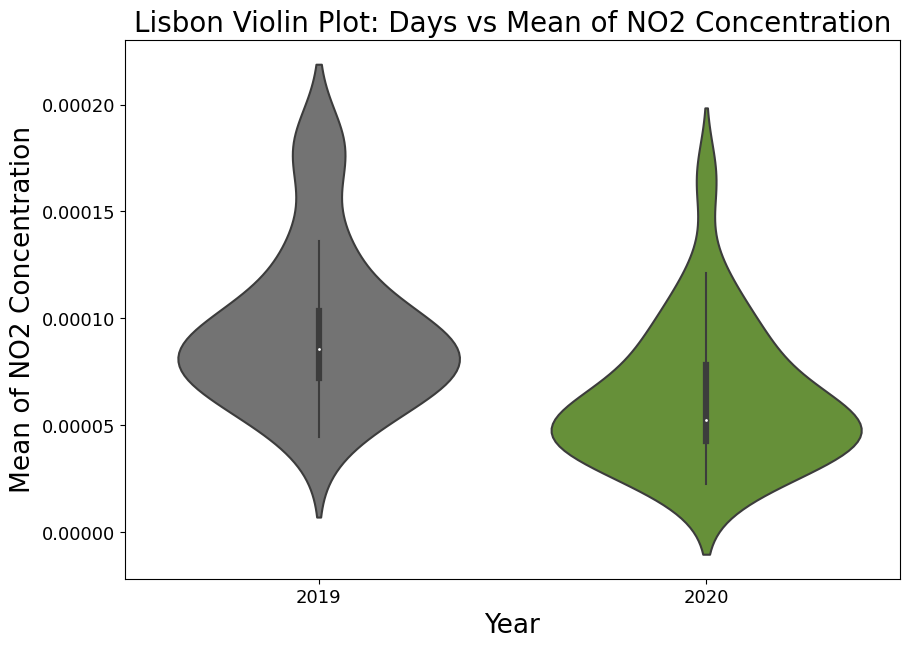

In [30]:
plt.figure(figsize=(10,7))
max_vs_days_violinplt = sns.violinplot(data=df_lisbon, x="year",y= "mean", palette=["#737373", "#679F2A"])
max_vs_days_violinplt.axes.set_title("Lisbon Violin Plot: Days vs Mean of NO2 Concentration",fontsize=20)
max_vs_days_violinplt.set_xlabel("Year",fontsize=19)
max_vs_days_violinplt.set_ylabel("Mean of NO2 Concentration",fontsize=19)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

Violin Plot showing the mean of Nitrogen Dioxide for every day in the month of April in Lisbon in 2019 and 2020. The Violin Plot shows most of the calculated data is between the 0.00005-0.00010 range for both years. It is shown that 2019 has quite higher means, but they will be later visualized by other plots to be classified as outliers or not. The Violin Plot shows that the "Mean" may not be the best variable used to formulate the hypothesis upon.

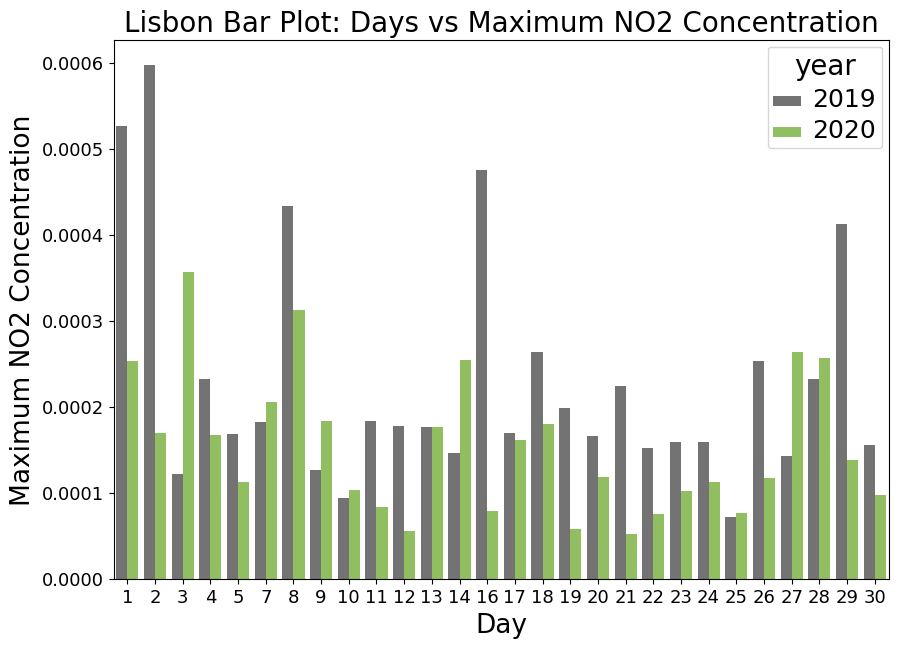

In [31]:
plt.figure(figsize=(10,7))
max_vs_days_barplt = sns.barplot(data=df_lisbon, x="day", y="max", hue="year", palette=["#737373", "#92CD52"])
max_vs_days_barplt.axes.set_title("Lisbon Bar Plot: Days vs Maximum NO2 Concentration",fontsize=20)
max_vs_days_barplt.set_xlabel("Day",fontsize=19)
max_vs_days_barplt.set_ylabel("Maximum NO2 Concentration",fontsize=19)
plt.setp(max_vs_days_barplt.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(max_vs_days_barplt.get_legend().get_title(), fontsize='20')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

Bar Plot showing the maximum computed value of Nitrogen Dioxide for each day in the month of April in Lisbon in 2019 and 2020. The bar plot shows that the values in 2019 are considerably higher than 2020's. On notable few days of April, "1", "2", "16", and "29", 2019 shows that the level of Nitrogen Dioxide is much higher and concentrated.

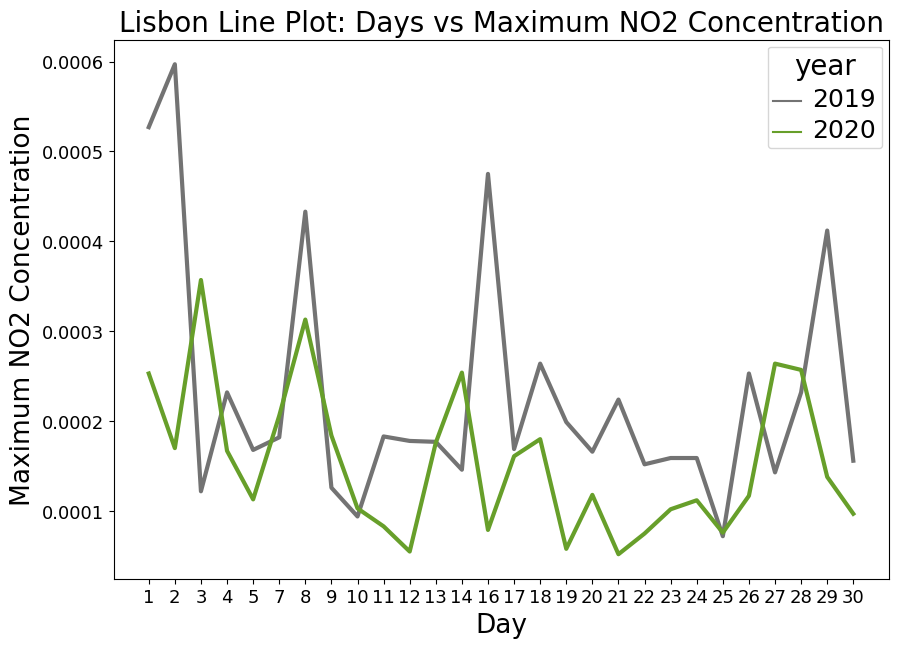

In [32]:
plt.figure(figsize=(10,7))
max_vs_days_lineplt = sns.lineplot(data=df_lisbon, x="day", y="max", hue ="year", palette=["#737373", "#679F2A"], linewidth = 3)
max_vs_days_lineplt.axes.set_title("Lisbon Line Plot: Days vs Maximum NO2 Concentration",fontsize=20)
max_vs_days_lineplt.set_xlabel("Day",fontsize=19)
max_vs_days_lineplt.set_ylabel("Maximum NO2 Concentration",fontsize=19)
plt.setp(max_vs_days_lineplt.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(max_vs_days_lineplt.get_legend().get_title(), fontsize='20')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

Line Plot showing the maximum computed value of Nitrogen Dioxide for each day in the month of April in Lisbon in 2019 and 2020. The Line Plot shows that the maximum NO2 concentration in 2019 is much higher than the value in 2020 which is a motive to construct a hypothesis and conduct hypothesis testing on the two following categories, **maximum NO2 concentration values in 2019** and **maximum NO2 concentration values in 2020.**

### Step 1. Define null and alternative hypothesis
**μ1**: maximum NO2 concentration in April 2019

**μ2**: maximum NO2 concentration in April 2020

**Null hypothesis (H0)** : μ1 = μ2 (the two population means are equal)

There is **no difference** between the maximum NO2 concentration, before and after the Covid-19 Pandemic, in Lisbon, Portugal. The Covid-19 Pandemic has no effect on the maximum NO2 concentration in Lisbon, Portugal.

**Alternative hypothesis (Ha)** : μ1 ≠ μ2 (the two population means are not equal)

There is a **right-tailed difference**, μ1 > μ2, between the maximum NO2 concentration, before and after the Covid-19 Pandemic, in Lisbon, Portugal. The maximum NO2 concentration is higher in April 2019 than in 2020 due to the Covid-19 pandemic which led to lockdown/quarantine all over Portugal.

In [33]:
rv = t(df=28-2)

### Step 2. Choose the appropriate test

The appropriate test to conduct the hypothesis testing is the paired samples T-test. A paired samples T-test is used to compare the means of two samples when each observation in one sample can be paired with an observation in the other sample.

### Paired Samples T-test: Motivation
A paired samples T-test is commonly used in two scenarios:

1. A measurement is taken on a subject before and after some treatment – e.g. the maximum NO2 concentration is measured in April 2019 and April 2020, and the treatment, between both periods, is the Covid-19 pandemic.

2. A measurement is taken under two different conditions – e.g. the maximum NO2 concentration is measured in April 2019 and April 2020, and the condition, between both periods, is the Covid-19 pandemic.

In both cases, I am interested in comparing the maxmimum value between two groups in which each observation in one sample can be paired with an observation in the other sample.


In [34]:
t_stat,p_value = ttest_ind(df_lisbon.loc[:28,['max']],df_lisbon.loc[30:,['max']])

### Step 3. Calculate the p-value


In [35]:
print("T-stat value:", t_stat)
print("P-value:", p_value)

T-stat value: [2.64792109]
P-value: [0.01064432]


### Step 4. Determine the statistical significance

The commonly used significance level threshold is 0.05. Since the p-value here (0.010) is less than 0.05, I can reject the Null Hypothesis (H0). Thus, there is evidence that the Alternative Hypothesis (Ha) holds. In conclusion, it is safe to say that the maximum NO2 concentration is higher in April 2019 than in April 2020 which means that the Covid-19 Pandemic's Quarantine has had a positive effect on the NO2 levels in Lisbon, Portugal where the NO2 levels have decreased in 2020 which was about one year since the Covid-19 Pandemic's Quarantine took place.